In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('dengue.csv')
df.head()

,Name,Fever,Headache,JointPain,Bleeding,Dengue
0,Jeremy Long,0,0,1,1,1
1,Cassandra Glover,1,1,1,0,1
2,Aaron Adams MD,0,1,1,0,0
3,Elizabeth Thomas,0,1,0,1,1
4,Mathew Perez,0,0,1,0,1


In [4]:
df.isnull().sum()

Name         0
Fever        0
Headache     0
JointPain    0
Bleeding     0
Dengue       0
dtype: int64

In [5]:
df.shape

(1000000, 6)

In [6]:
df.describe()

,Fever,Headache,JointPain,Bleeding,Dengue
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.499779,0.499374,0.500353,0.500231,0.499929
std,0.500000,0.500000,0.500000,0.500000,0.500000
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
categorical_val = []
continous_val = []
for column in df.columns:
    # print('==============================')
    # print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [8]:
print("Categorical features:")
print(categorical_val)
print('Continuous features:')
print(continous_val)

Categorical features:
['Fever', 'Headache', 'JointPain', 'Bleeding', 'Dengue']
Continuous features:
['Name']


In [9]:
feature_columns = df.columns.to_list()

In [10]:
print("Number of qualitative features: " +str(len(categorical_val) ) + " (" + str(len(categorical_val)/40 *100) + "%)")
print("Number of quantative features: " +str(len(continous_val) ) + " (" + str(len(continous_val)/40 *100) + "%)")

Number of qualitative features: 5 (12.5%)
Number of quantative features: 1 (2.5%)


In [11]:
for feature in categorical_val:
    # Convert numerical values to strings before sorting
    vals = sorted([str(val) for val in df[feature].unique()])
    print(feature, ":", vals)

Fever : ['0', '1']
Headache : ['0', '1']
JointPain : ['0', '1']
Bleeding : ['0', '1']
Dengue : ['0', '1']


In [13]:
print(df.isnull().sum())

Name         0
Fever        0
Headache     0
JointPain    0
Bleeding     0
Dengue       0
dtype: int64


In [14]:
df.columns

Index(['Name', 'Fever', 'Headache', 'JointPain', 'Bleeding', 'Dengue'], dtype='object')

In [15]:
idx = df['Dengue'].notnull() 

In [16]:
print(f'Dataset size: {df.shape}')
print(f'Non-null rows: {idx.notnull().sum()}')

Dataset size: (1000000, 6)
Non-null rows: 1000000


In [19]:
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Name ==> Missing zeros : 0
Fever ==> Missing zeros : 500221
Headache ==> Missing zeros : 500626
JointPain ==> Missing zeros : 499647
Bleeding ==> Missing zeros : 499769
Dengue ==> Missing zeros : 500071


In [21]:
df['Dengue']

0         1
1         1
2         0
3         1
4         1
         ..
999995    1
999996    0
999997    1
999998    0
999999    0
Name: Dengue, Length: 1000000, dtype: int64

In [22]:
def remove_outliers(dataset, numeric_columns, num_std=3):
   for column in numeric_columns: 
      mean = dataset[column].mean()
      sd = dataset[column].std() 
      dataset = dataset[(dataset[column] <= mean + (num_std * sd))]
      dataset = dataset[(dataset[column] >= mean - (num_std * sd))]
   return dataset

In [23]:
df.columns

Index(['Name', 'Fever', 'Headache', 'JointPain', 'Bleeding', 'Dengue'], dtype='object')

In [27]:
subset_4 = df[['Fever', 'Headache', 'JointPain', 'Bleeding', 'Dengue']]
subset_4.shape

(1000000, 5)

In [36]:
total_num_Fever = 0
total_num_Headache = 0
total_num_JointPain = 0
total_num_Bleeding = 0

for index, row in subset_4.iterrows():
    
    if ( row['Dengue']== 1 or row['Dengue']== 2 or row['Dengue']== 3):
        
            if(row['Fever'] == 1):

                total_num_Fever = total_num_Fever + 1

            if(row['Headache'] == 1):
                total_num_Headache = total_num_Headache +1 

            if(row['JointPain'] == 1):
                total_num_JointPain = total_num_JointPain +1 

            if(row['Bleeding'] == 1):
                total_num_Bleeding = total_num_Bleeding +1         

In [35]:
print("Total number of positive cases - Fever: "+ str(total_num_Fever))
print("Total number of positive cases - Headache: "+ str(total_num_Headache))
print("Total number of positive cases - JointPain: "+ str(total_num_JointPain))
print("Total number of positive cases - Bleeding: "+ str(total_num_Bleeding))

Total number of positive cases - Fever: 250298
Total number of positive cases - Headache: 249689
Total number of positive cases - JointPain: 250120
Total number of positive cases - Bleeding: 250191


Total number of Positive Dengue cases: 499929


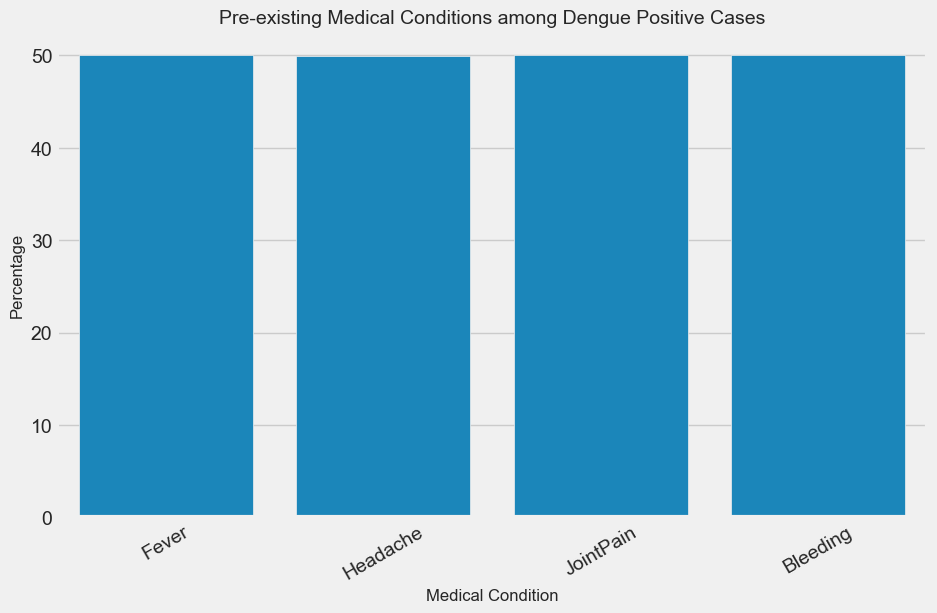

In [41]:
percentages_pre_existing = []

# Total number of positive Dengue cases
total_num_pos = 0

for index, row in subset_4.iterrows():
    if row['Dengue'] in [1, 2, 3]:
        total_num_pos += 1

print("Total number of Positive Dengue cases: " + str(total_num_pos)) 

# Calculating percentages for each symptom
percentages_pre_existing.append((total_num_Fever / total_num_pos) * 100)
percentages_pre_existing.append((total_num_Headache / total_num_pos) * 100)
percentages_pre_existing.append((total_num_JointPain / total_num_pos) * 100)
percentages_pre_existing.append((total_num_Bleeding / total_num_pos) * 100)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Fever', 'Headache', 'JointPain', 'Bleeding']  

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=percentages_pre_existing)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title("Pre-existing Medical Conditions among Dengue Positive Cases", fontsize=14)
plt.xticks(rotation=30)
plt.show()


Total number of Positive Dengue cases: 499929


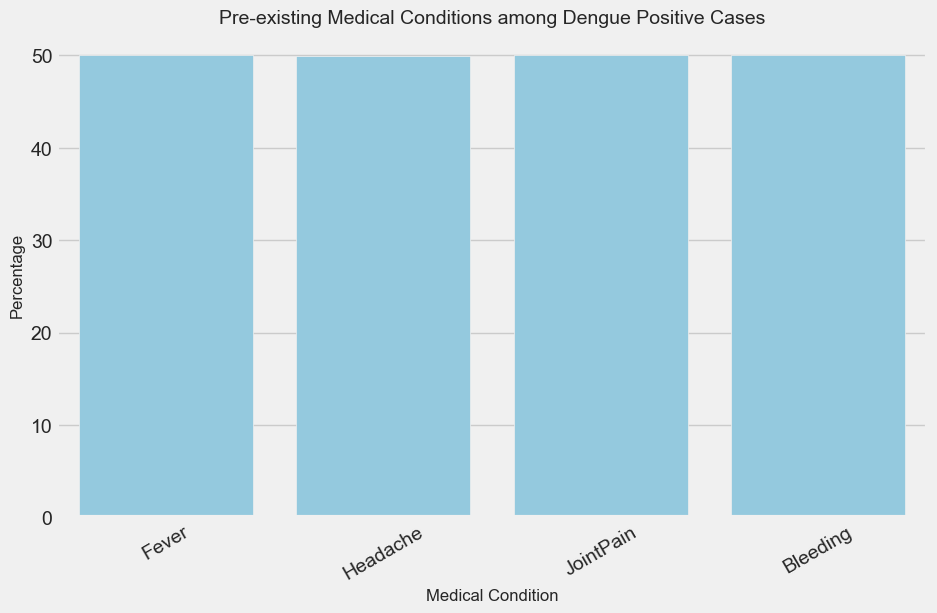

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color
bar_color = 'skyblue'

# Total number of positive Dengue cases
total_num_pos = 0

for index, row in subset_4.iterrows():
    if row['Dengue'] in [1, 2, 3]:
        total_num_pos += 1

print("Total number of Positive Dengue cases: " + str(total_num_pos)) 

# Calculating percentages for each symptom
percentages_pre_existing = [
    (total_num_Fever / total_num_pos) * 100,
    (total_num_Headache / total_num_pos) * 100,
    (total_num_JointPain / total_num_pos) * 100,
    (total_num_Bleeding / total_num_pos) * 100
]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=percentages_pre_existing, color=bar_color)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title("Pre-existing Medical Conditions among Dengue Positive Cases", fontsize=14)
plt.xticks(rotation=30)
plt.show()


In [48]:
df.columns

Index(['Name', 'Fever', 'Headache', 'JointPain', 'Bleeding', 'Dengue'], dtype='object')

#### 2.1.3 Train and Test Dataset

#### 2.1.2 Removing any near zero variance features

We tried reoving any numeric continuos features that have near zero variance. There deosn't seem to be any in this dataset

In [50]:
extracted_df = df.drop(['Name'], axis = 'columns')

In [51]:
extracted_df.shape

(1000000, 5)

In [52]:
extracted_categorical_val = []
for column in extracted_df.columns:
    # print('==============================')
    # print(f"{column} : {df[column].unique()}")
    if len(extracted_df[column].unique()) <= 10:
        extracted_categorical_val.append(column)

In [53]:
for column in extracted_categorical_val:
    extracted_df.drop(extracted_df.loc[extracted_df[column] == 97].index, inplace=True)
    extracted_df.drop(extracted_df.loc[extracted_df[column] == 98].index, inplace=True)
    extracted_df.drop(extracted_df.loc[extracted_df[column] == 99].index, inplace=True)

In [54]:
extracted_df.shape

(1000000, 5)

In [55]:
def remove_features_near_zero_variance(dataset, threshold=1e-4):
    continous_val = []
    numeric_columns = dataset.select_dtypes('int64').columns
    for column in numeric_columns:
    # print('==============================')
    # print(f"{column} : {df[column].unique()}")
        if len(dataset[column].unique()) > 10:
            continous_val.append(column)

    columns_to_drop = []
    for column in continous_val:
        if dataset[column].std()**2 < threshold:
            columns_to_drop.append(column)
    dataset = dataset.drop(columns=columns_to_drop)
    return dataset

In [56]:
extracted_df = remove_features_near_zero_variance(extracted_df);

In [57]:
extracted_df.shape

(1000000, 5)

In [58]:
def remove_highly_correlated_features(dataset, threshold=0.9):
    numeric_columns = dataset.select_dtypes('int64').columns
    correlation_matrix = dataset[numeric_columns].corr().abs()

    columns_to_drop = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
               colname = correlation_matrix.columns[i]
               columns_to_drop.add(colname)

    dataset = dataset.drop(columns=columns_to_drop)
    return dataset

In [59]:
extracted_df = remove_highly_correlated_features(extracted_df)

In [60]:
extracted_df.shape

(1000000, 5)

In [61]:
extracted_df.groupby(['Dengue'])['Dengue'].count()

Dengue
0    500071
1    499929
Name: Dengue, dtype: int64

In [62]:
#extracted_df['CLASIFICACION_FINAL'] = extracted_df['CLASIFICACION_FINAL'].replace([2, 3], 1)

In [63]:
extracted_df.groupby(['Dengue'])['Dengue'].count()

Dengue
0    500071
1    499929
Name: Dengue, dtype: int64

In [64]:
positive_cases_df = extracted_df.loc[extracted_df['Dengue'] == 0]
negative_cases_df = extracted_df.loc[extracted_df['Dengue'] == 1]

# Change value 7 to 0 so that we can treat it as a standard binary classifcation problem later on
#negative_cases_df['CLASIFICACION_FINAL'] = negative_cases_df['CLASIFICACION_FINAL'].replace(7, 0)

In [65]:
print("Total positive cases:", positive_cases_df.shape[0])
print("Total negative cases:", negative_cases_df.shape[0])

Total positive cases: 500071
Total negative cases: 499929


In [67]:
print(type(train_positive_df))
print(type(train_negative_df))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


train_positive_df = positive_cases_df[:80000]
test_positive_df = positive_cases_df[80000:100000]
train_negative_df = negative_cases_df[:80000]
test_negative_df = negative_cases_df[80000:100000]

train_df = train_positive_df.append(train_negative_df, ignore_index=True)
test_df = test_positive_df.append(test_negative_df, ignore_index=True)

In [68]:
train_positive_df = positive_cases_df[:80000]
test_positive_df = positive_cases_df[80000:100000]
train_negative_df = negative_cases_df[:80000]
test_negative_df = negative_cases_df[80000:100000]

train_df = pd.concat([train_positive_df, train_negative_df], ignore_index=True)
test_df = pd.concat([test_positive_df, test_negative_df], ignore_index=True)


In [69]:
from sklearn.utils import shuffle

train_df = shuffle(train_df)
test_df = shuffle(test_df)

print("Train Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)

Train Dataset Shape: (160000, 5)
Test Dataset Shape: (40000, 5)


In [72]:
train_y = train_df['Dengue'].tolist()
test_y = test_df['Dengue'].tolist()

train_x = train_df.drop('Dengue', axis=1)
test_x = test_df.drop('Dengue', axis=1)

print("Train Dataset Shape:", train_x.shape)
print("Test Dataset Shape:", test_x.shape)

Train Dataset Shape: (160000, 4)
Test Dataset Shape: (40000, 4)


### 2.2 Building Random Forest Models

In [73]:
from sklearn.tree import DecisionTreeClassifier

dtree_classifier = DecisionTreeClassifier(random_state=0)
dtree_classifier.fit(train_x, train_y)

# classify the instances
train_accuracy = dtree_classifier.score(train_x, train_y)
test_accuracy = dtree_classifier.score(test_x, test_y)
print('Train Accuracy: ' + str(round(train_accuracy, 3)))
print('Test Accuracy: ' + str(round(test_accuracy, 3)))

Train Accuracy: 0.504
Test Accuracy: 0.504


In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(train_x, train_y)

# classify the instances
train_accuracy = rf.score(train_x, train_y)
test_accuracy = rf.score(test_x, test_y)
print('Train Accuracy: ' + str(round(train_accuracy, 3)))
print('Test Accuracy: ' + str(round(test_accuracy, 3)))

Train Accuracy: 0.504
Test Accuracy: 0.504


In [75]:
num_trees = []
train_accuracy_list = []
test_accuracy_list = []

for x in range(10, 151, 10):
    rf = RandomForestClassifier(random_state=0, n_estimators=x)
    rf.fit(train_x, train_y)

    # classify the instances
    train_accuracy = rf.score(train_x, train_y)
    test_accuracy = rf.score(test_x, test_y)

    num_trees.append(x)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

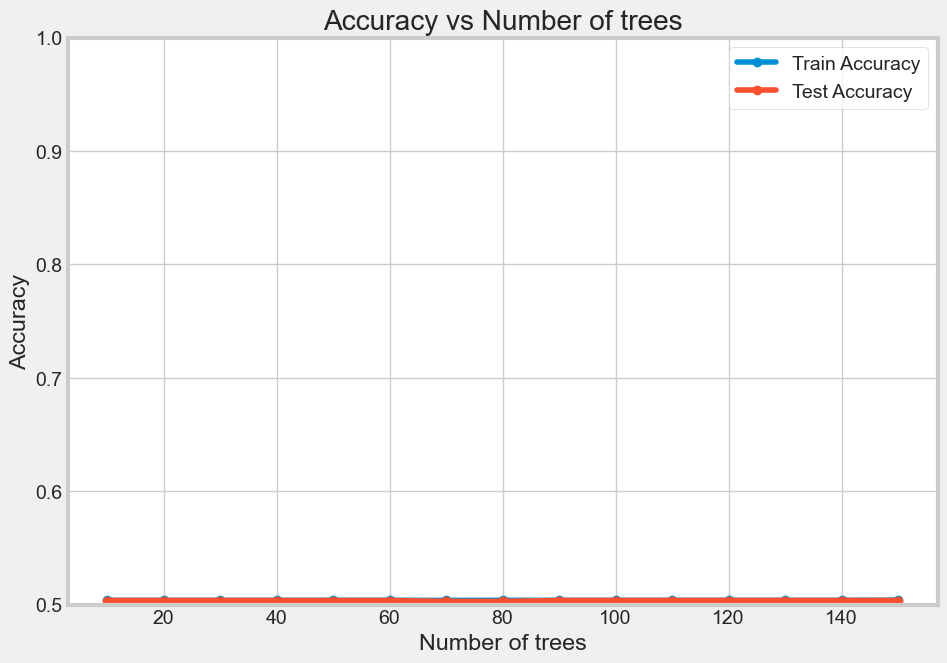

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

plt.plot(num_trees, train_accuracy_list, 'o-', label = "Train Accuracy")
plt.plot(num_trees, test_accuracy_list, 'o-', label = "Test Accuracy")
plt.title("Accuracy vs Number of trees")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.locator_params(axis='x')
plt.legend(loc='upper right')

ax = plt.gca()
ax.set_ylim([0.5, 1])

plt.show()

In [77]:
train_size = []
train_accuracy_list_vary_size = []
test_accuracy_list_vary_size = []

for x in range(10000, 161000, 10000):
    rf = RandomForestClassifier(random_state=0)
    split_train_x = train_x[:x+10000]
    split_train_y = train_y[:x+10000]

    rf.fit(split_train_x, split_train_y)

    # classify the instances
    train_accuracy = rf.score(split_train_x, split_train_y)
    test_accuracy = rf.score(test_x, test_y)

    train_size.append(x)
    train_accuracy_list_vary_size.append(train_accuracy)
    test_accuracy_list_vary_size.append(test_accuracy)

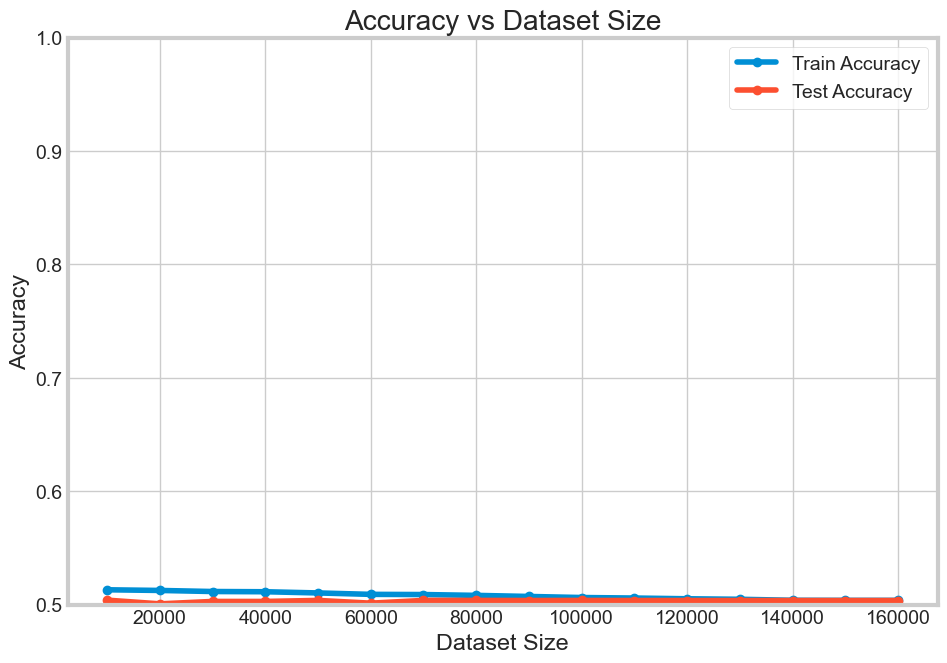

In [78]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

plt.plot(train_size, train_accuracy_list_vary_size, 'o-', label = "Train Accuracy")
plt.plot(train_size, test_accuracy_list_vary_size, 'o-', label = "Test Accuracy")
plt.title("Accuracy vs Dataset Size")
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.locator_params(axis='x')
plt.legend(loc='upper right')

ax = plt.gca()
ax.set_ylim([0.5, 1])

plt.show()

In [79]:
max_depth = []
train_accuracy_list_max_depth = []
test_accuracy_list_max_depth = []

for x in range(5, 16):
    rf = RandomForestClassifier(random_state=0, max_depth=x)
    rf.fit(train_x, train_y)

    # classify the instances
    train_accuracy = rf.score(train_x, train_y)
    test_accuracy = rf.score(test_x, test_y)


    max_depth.append(x)
    train_accuracy_list_max_depth.append(train_accuracy)
    test_accuracy_list_max_depth.append(test_accuracy)

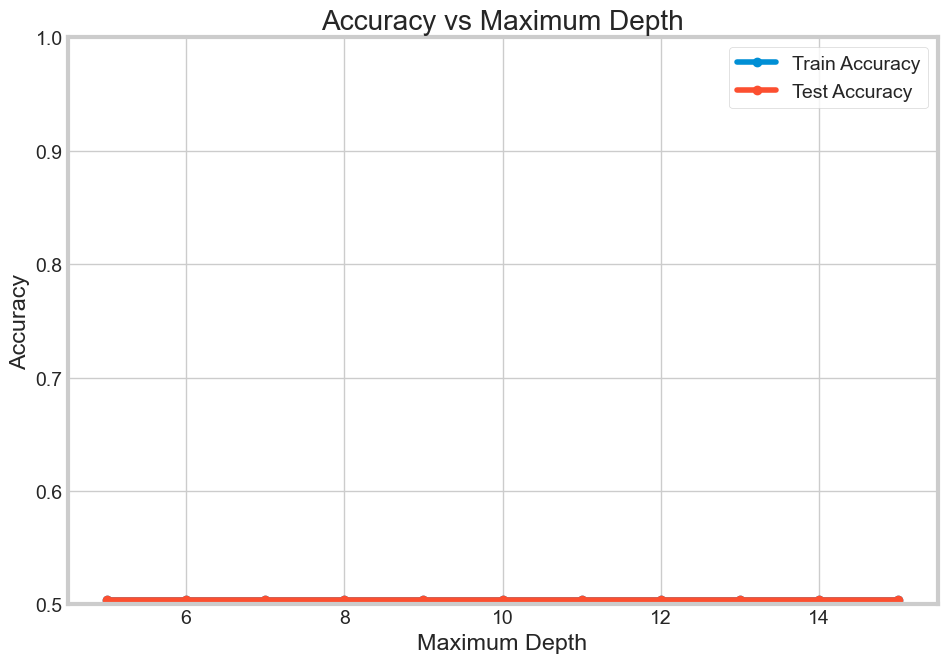

In [80]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

plt.plot(max_depth, train_accuracy_list_max_depth, 'o-', label = "Train Accuracy")
plt.plot(max_depth, test_accuracy_list_max_depth, 'o-', label = "Test Accuracy")
plt.title("Accuracy vs Maximum Depth")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.locator_params(axis='x')
plt.legend(loc='upper right')

ax = plt.gca()
ax.set_ylim([0.5, 1])

plt.show()

In [81]:
rf = RandomForestClassifier(random_state=0, max_depth=15)
rf.fit(train_x, train_y)

# classify the instances
train_accuracy = rf.score(train_x, train_y)
test_accuracy = rf.score(test_x, test_y)
pred = rf.predict(test_x)
print('Train Accuracy: ' + str(round(train_accuracy, 3)))
print('Test Accuracy: ' + str(round(test_accuracy, 3)))

Train Accuracy: 0.504
Test Accuracy: 0.504


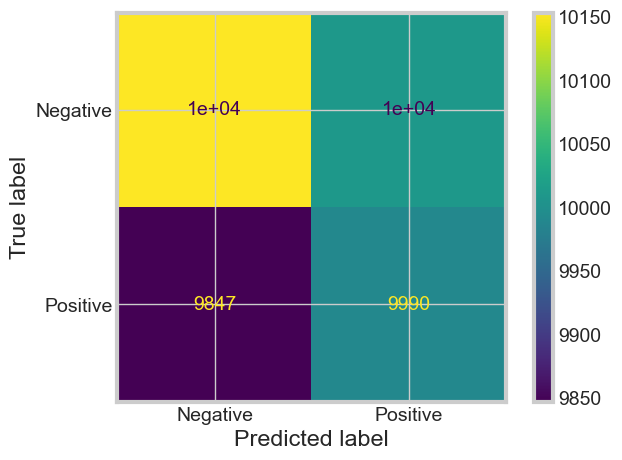

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

cd_matrix = confusion_matrix(pred, test_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cd_matrix, display_labels=["Negative", "Positive"])
disp.plot()

plt.show()

In [83]:
tp = 12518
tn = 16207
fp = 7482
fn = 3793
print("True Positive Rate:", round(tp/(tp+fn), 3))
print("True Negative Rate:", round(tn/(fp+tn), 3))
print("False Positive Rate:", round(fp/(fp+tn), 3))
print("False Negative Rate:", round(fn/(fn+tp), 3))

True Positive Rate: 0.767
True Negative Rate: 0.684
False Positive Rate: 0.316
False Negative Rate: 0.233


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [85]:
df = pd.read_csv('dengue.csv')

In [86]:
X = df.drop(['Name', 'Dengue'], axis=1)
y = df['Dengue']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
rf = RandomForestClassifier(random_state=0)

In [89]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [90]:
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

In [91]:
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

In [92]:
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.5015375
Test Accuracy: 0.49976


In [93]:
print('Classification Report for Test Data:')
print(classification_report(y_test, test_preds))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53    100035
           1       0.50      0.44      0.47     99965

    accuracy                           0.50    200000
   macro avg       0.50      0.50      0.50    200000
weighted avg       0.50      0.50      0.50    200000



In [94]:
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, test_preds))

Confusion Matrix for Test Data:
[[56129 43906]
 [56142 43823]]


In [ ]:
# Define the reduced parameter grid
param_grid_reduced = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest classifier
rf_reduced = RandomForestClassifier(random_state=0)

# Grid search with cross-validation
grid_search_reduced = GridSearchCV(rf_reduced, param_grid_reduced, cv=5, scoring='accuracy')
grid_search_reduced.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters (Reduced):", grid_search_reduced.best_params_)
print("Best Score (Reduced):", grid_search_reduced.best_score_)


In [ ]:
# Fit Random Forest to obtain feature importances
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Select top features (e.g., top 3)
top_features = feature_importances_sorted.head(3).index.tolist()
print("Top Features:", top_features)

# Update X_train and X_test with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to the training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=0)

# Train the model
xgb.fit(X_train, y_train)

# Predictions
train_preds_xgb = xgb.predict(X_train)
test_preds_xgb = xgb.predict(X_test)

# Evaluate the model
train_accuracy_xgb = accuracy_score(y_train, train_preds_xgb)
test_accuracy_xgb = accuracy_score(y_test, test_preds_xgb)

print('XGBoost Train Accuracy:', train_accuracy_xgb)
print('XGBoost Test Accuracy:', test_accuracy_xgb)


In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
